In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, f1_score,accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable


In [2]:
data_ipl = pd.read_csv('ipl_matches.csv')

In [22]:
data_ipl.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
result_normal      0
result_tie         0
dtype: int64

In [4]:
data_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

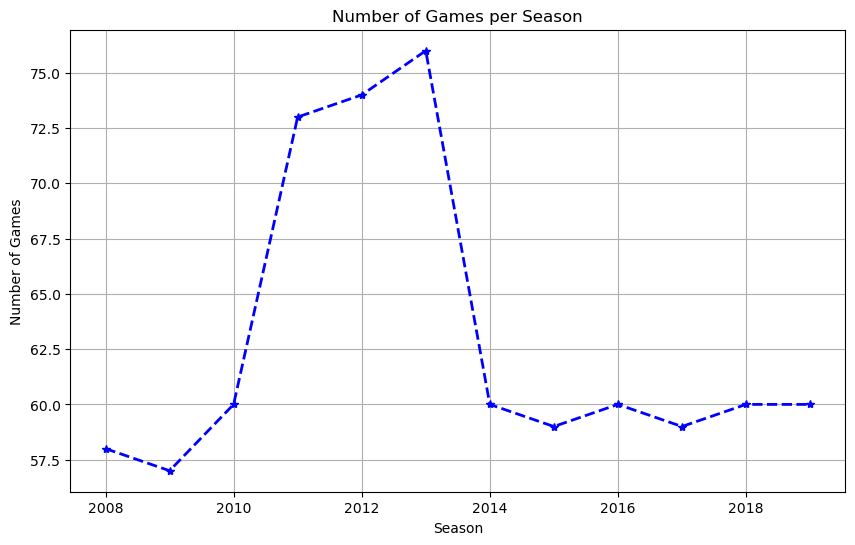

In [25]:
#EDA
#Univariate analysis 
plt.figure(figsize=(10, 6))
plt.plot(data_ipl.groupby('Season')['id'].count().index, data_ipl.groupby('Season')['id'].count().values, marker='*', color='b', linestyle='--', linewidth=2)
plt.title('Number of Games per Season')
plt.xlabel('Season')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

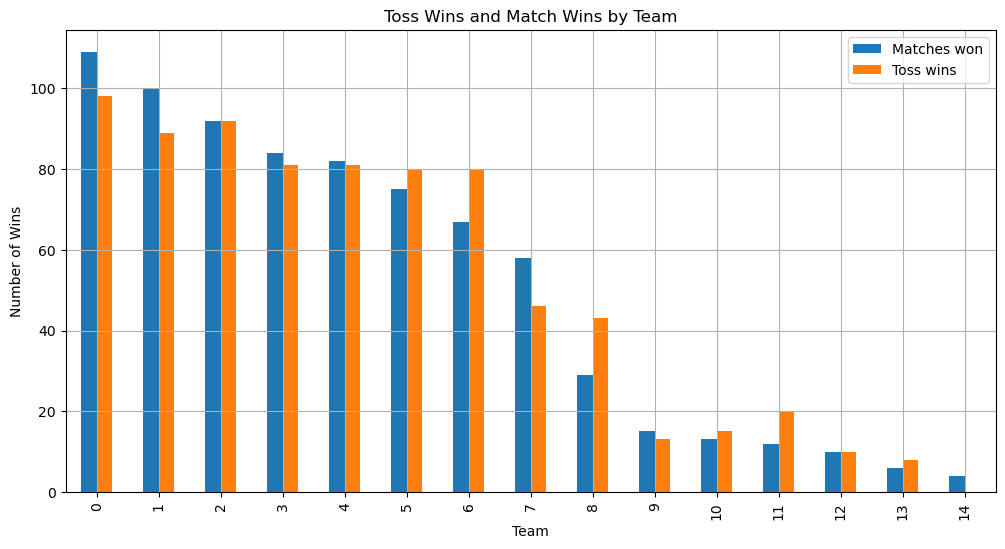

In [67]:
match_wins = data_ipl['winner'].value_counts()
toss_wins  = data_ipl['toss_winner'].value_counts()

team_stats = pd.DataFrame({'Matches won': match_wins,
                           'Toss wins': toss_wins})

team_stats.plot(kind='bar', figsize = (12,6))
plt.title('Toss Wins and Match Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)  
plt.grid(True)
plt.show()

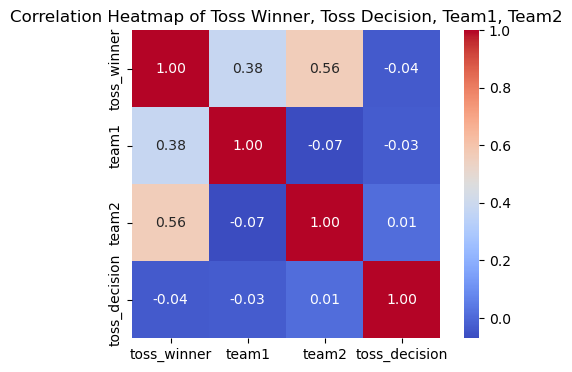

In [20]:
subset = data_ipl[['toss_winner','team1','team2','toss_decision']]
corr = subset.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Toss Winner, Toss Decision, Team1, Team2')
plt.show()

In [8]:
data_ipl['Season'] = data_ipl['Season'].str.extract(r'(\d{4})').astype(int)

In [9]:
data_ipl['team1'] = data_ipl['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data_ipl['team2'] = data_ipl['team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data_ipl['toss_winner'] = data_ipl['toss_winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data_ipl['winner'] = data_ipl['winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

In [10]:
data_ipl['city'] = data_ipl['city'].fillna('Dubai')
data_ipl['umpire1'] = data_ipl['umpire1'].fillna(method = 'ffill')
data_ipl['umpire2'] = data_ipl['umpire2'].fillna(method = 'ffill')
data_ipl['umpire3'] = data_ipl['umpire3'].fillna(method = 'bfill')

In [11]:
data_ipl['winner'] = data_ipl['winner'].fillna('No Result')
data_ipl['player_of_match'] = data_ipl['player_of_match'].fillna('No Result')

In [12]:
data_ipl['toss_decision'] = data_ipl['toss_decision'].map({'bat':1, 'field':0})

In [13]:
data_ipl = pd.get_dummies(data_ipl,columns = ['result'], drop_first = True)

In [14]:
data_ipl['winner'] = data_ipl['winner'].map({'Chennai Super Kings': 1, 'Mumbai Indians': 0,'Kolkata Knight Riders': 2,'Royal Challengers Bangalore': 3,'Kings XI Punjab': 4,'Rajasthan Royals': 5,'Delhi Daredevils': 6,'Sunrisers Hyderabad': 7,'Deccan Chargers': 8,'Rising Pune Supergiant': 9,'Gujarat Lions': 10,'Pune Warriors': 11,'Delhi Capitals': 12,'Kochi Tuskers Kerala': 13,'No Result': 14})

In [15]:
data_ipl['team1'] = data_ipl['team1'].map({'Chennai Super Kings':1, 'Mumbai Indians':0,'Kolkata Knight Riders':2,'Royal Challengers Bangalore':3,'Kings XI Punjab':4,'Rajasthan Royals':5,'Delhi Daredevils':6,'Sunrisers Hyderabad':7,'Deccan Chargers':8,'Rising Pune Supergiant':9,'Gujarat Lions':10,'Pune Warriors':11,'Delhi Capitals':12,'Kochi Tuskers Kerala':13})

In [16]:
data_ipl['team2'] = data_ipl['team2'].map({'Chennai Super Kings':1, 'Mumbai Indians':0,'Kolkata Knight Riders':2,'Royal Challengers Bangalore':3,'Kings XI Punjab':4,'Rajasthan Royals':5,'Delhi Daredevils':6,'Sunrisers Hyderabad':7,'Deccan Chargers':8,'Rising Pune Supergiant':9,'Gujarat Lions':10,'Pune Warriors':11,'Delhi Capitals':12,'Kochi Tuskers Kerala':13})

In [17]:
data_ipl['toss_winner'] = data_ipl['toss_winner'].map({'Chennai Super Kings':1, 'Mumbai Indians':0,'Kolkata Knight Riders':2,'Royal Challengers Bangalore':3,'Kings XI Punjab':4,'Rajasthan Royals':5,'Delhi Daredevils':6,'Sunrisers Hyderabad':7,'Deccan Chargers':8,'Rising Pune Supergiant':9,'Gujarat Lions':10,'Pune Warriors':11,'Delhi Capitals':12,'Kochi Tuskers Kerala':13,'No Result':14})

In [18]:
label_encoder = LabelEncoder()
data_ipl[data_ipl.select_dtypes(include=['object']).columns] = data_ipl.select_dtypes(include=['object']).apply(label_encoder.fit_transform)

In [19]:
data_ipl.shape

(756, 19)

In [23]:
data_ipl['winner'].value_counts()

winner
0     109
1     100
2      92
3      84
4      82
5      75
6      67
7      58
8      29
9      15
10     13
11     12
12     10
13      6
14      4
Name: count, dtype: int64

In [24]:
data_ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,result_normal,result_tie
0,1,2017,15,59,7,3,3,0,0,7,35,0,225,28,6,34,2,True,False
1,2,2017,27,75,0,9,9,0,0,9,0,7,200,21,1,49,2,True,False
2,3,2017,29,90,10,2,2,0,0,2,0,10,34,31,38,16,2,True,False
3,4,2017,16,109,9,4,4,0,0,4,0,6,61,13,3,14,2,True,False
4,5,2017,2,109,3,6,3,1,0,3,15,0,99,17,3,14,2,True,False


In [26]:
features = data_ipl.drop(columns=['id','winner'], axis=1)
target = data_ipl['winner']
print(features)

     Season  city  date  team1  team2  toss_winner  toss_decision  dl_applied  \
0      2017    15    59      7      3            3              0           0   
1      2017    27    75      0      9            9              0           0   
2      2017    29    90     10      2            2              0           0   
3      2017    16   109      9      4            4              0           0   
4      2017     2   109      3      6            3              1           0   
..      ...   ...   ...    ...    ...          ...            ...         ...   
751    2019    24    71      2      0            0              0           0   
752    2019     8   103      1      0            1              1           0   
753    2019    32   122      7     12           12              0           0   
754    2019    32   161     12      1            1              0           0   
755    2019    15   201      0      1            0              1           0   

     win_by_runs  win_by_wi

In [27]:
print(target)

0       7
1       9
2       2
3       4
4       3
       ..
751     0
752     0
753    12
754     1
755     0
Name: winner, Length: 756, dtype: int64


In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(features)

MinMaxScaler()

In [30]:
normalized_data  = scaler.transform(features)

In [31]:
print(normalized_data)

[[0.81818182 0.46875    0.10825688 ... 0.08333333 1.         0.        ]
 [0.81818182 0.84375    0.13761468 ... 0.08333333 1.         0.        ]
 [0.81818182 0.90625    0.16513761 ... 0.08333333 1.         0.        ]
 ...
 [1.         1.         0.22385321 ... 0.25       1.         0.        ]
 [1.         1.         0.29541284 ... 0.25       1.         0.        ]
 [1.         0.46875    0.36880734 ... 0.625      1.         0.        ]]


In [32]:
features = normalized_data
target = data_ipl['winner']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features,target,train_size=0.7, random_state=8)

In [34]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(529, 17) (227, 17) (529,) (227,)


In [35]:
#LOGISTIC REGRESSION
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [37]:
#accuracy score of training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [38]:
print('Accuracy score of training:', training_data_accuracy)

Accuracy score of training: 0.3572778827977316


In [39]:
#accuracy score of testing data
x_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [40]:
print('Accuracy score of Testing:', testing_data_accuracy)

Accuracy score of Testing: 0.24669603524229075


In [41]:
log_reg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100],          
    'penalty': ['l1', 'l2'],              
    'solver': ['liblinear']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_prediction_log = best_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_prediction_log))

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.27312775330396477


In [42]:
print("\nClassification Report:\n", classification_report(y_test, y_prediction_log))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49        29
           1       0.21      0.25      0.23        24
           2       0.23      0.42      0.29        24
           3       0.31      0.20      0.24        25
           4       0.14      0.12      0.13        24
           5       0.21      0.24      0.22        21
           6       0.00      0.00      0.00        22
           7       0.33      0.62      0.43        21
           8       0.60      0.23      0.33        13
           9       0.00      0.00      0.00         7
          10       0.29      0.40      0.33         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00         1

    accuracy                           0.27       227
   macro avg       0.25      0.26      0.25       227
w

In [43]:
#SVM - Classification
best_classifier=SVC(kernel='linear',random_state=8)
best_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=8)

In [44]:
y_pred_SVC=best_classifier.predict(x_test)

In [45]:
accuracy=accuracy_score(y_test,y_pred_SVC)
print('accuracy score: ',accuracy)
cm=confusion_matrix(y_test,y_pred_SVC)
print('confusion matrix: ',cm)

accuracy score:  0.2599118942731278
confusion matrix:  [[11  5  9  0  2  2  0  0  0  0  0  0  0  0  0]
 [ 6  9  4  2  1  0  1  1  0  0  0  0  0  0  0]
 [ 2  2 12  3  0  3  1  1  0  0  0  0  0  0  0]
 [ 1  4  5  3  8  1  1  2  0  0  0  0  0  0  0]
 [ 5  1  4  2  4  4  0  4  0  0  0  0  0  0  0]
 [ 3  6  2  1  3  4  1  1  0  0  0  0  0  0  0]
 [ 0  5  4  5  1  3  0  4  0  0  0  0  0  0  0]
 [ 1  0  1  0  2  3  2 12  0  0  0  0  0  0  0]
 [ 0  0  1  2  2  2  5  0  1  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  4  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  2  0  0  0  0]
 [ 0  0  0  0  1  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  2  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]


In [46]:
print(best_classifier.get_params())
param_grid = {'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']}

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 8, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [47]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=4)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=4)

In [48]:
best_classifier = grid_search.best_estimator_

y_pred_SVC_PT = best_classifier.predict(x_test)

final_accuracy_SVC = accuracy_score(y_test, y_pred_SVC_PT)
print("Final Accuracy on SVC Test Set:", final_accuracy_SVC)

cm = confusion_matrix(y_test, y_pred_SVC_PT)
print('Confusion Matrix:\n', cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred_SVC_PT))

Final Accuracy on SVC Test Set: 0.3700440528634361
Confusion Matrix:
 [[22  6  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8 11  4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  7 10  3  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  8  5  7  2  0  0  0  0  1  0  0  0  0]
 [ 0  2  3  7  5  4  1  2  0  0  0  0  0  0  0]
 [ 1  1  0  3  3  7  3  3  0  0  0  0  0  0  0]
 [ 0  0  0  3  4  5  6  4  0  0  0  0  0  0  0]
 [ 1  0  0  0  2  5  2 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  7  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  4  0  1  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  1  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  2  0  0  0]
 [ 1  0  0  0  0  0  1  1  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.76      0.68        29
           1       0.38      0.46      0.42        24
           2       0.

In [49]:
#KNN - Classifier 
clf = KNN(n_neighbors = 5, metric='euclidean') 

clf.fit(x_train, y_train)

test_predict = clf.predict(x_test)

k_1 = f1_score(y_test, test_predict, average='weighted')  
print("F1 Score:", k_1)

F1 Score: 0.19974323454892012


In [50]:
def Elbow(K):
    test_error = []
    for i in K:
        clf = KNN(n_neighbors=i) 
        clf.fit(x_train, y_train)
        tmp = clf.predict(x_test)
        f1 = f1_score(y_test, tmp, average='weighted') 
        error = 1 - f1
        test_error.append(error)
    return test_error

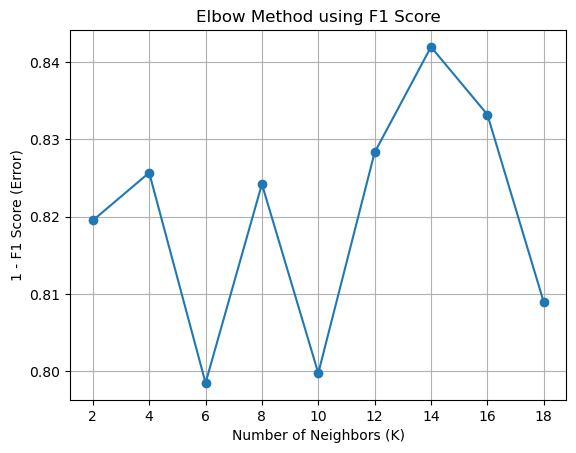

In [51]:
k = range(2, 20, 2)
test = Elbow(k)

plt.plot(k, test, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("1 - F1 Score (Error)")
plt.title("Elbow Method using F1 Score")
plt.grid(True)
plt.show()

In [54]:
# Creating KNN
clf = KNN(n_neighbors = 6) 

clf.fit(x_train, y_train)

test_predict = clf.predict(x_test,)
k_2 = f1_score(y_test, test_predict, average='weighted')

In [55]:
print("Before Elbow Method Knn Score: ",k_1)
print("After Elbow Method to put right K-Value Knn Score: ",k_2)

Before Elbow Method Knn Score:  0.19974323454892012
After Elbow Method to put right K-Value Knn Score:  0.20153403209100584


In [56]:
knn_model = KNN()
param_grid = {'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(x_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
final_accuracy_knn = accuracy_score(y_test, test_predict)
print("Final Accuracy on Test Set:", final_accuracy_knn)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best Cross-Validated Accuracy: 0.46504941599281224

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.66      0.58        29
           1       0.29      0.38      0.33        24
           2       0.33      0.58      0.42        24
           3       0.41      0.36      0.38        25
           4       0.33      0.29      0.31        24
           5       0.35      0.38      0.36        21
           6       0.30      0.27      0.29        22
           7       0.38      0.48      0.43        21
           8       0.50      0.08      0.13        13
           9       0.00      0.00      0.00         7
          10       0.67      0.40      0.50         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         2
          14       0.00      0

In [57]:
#Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict_DT = model.predict(x_test)
accuracy_score(y_test,y_predict_DT)

0.7533039647577092

In [58]:
dt_model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],         
    'max_depth': [None, 5, 10, 20, 30],        
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 5],              
    'max_features': [None, 'sqrt', 'log2'],     
    'splitter': ['best', 'random']              
}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', verbose=4, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_dt_model = grid_search.best_estimator_

y_pred_dt = best_dt_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

final_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Final Accuracy on Test Set:", final_accuracy_dt)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best Cross-Validated Accuracy: 0.8111051212938005

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.96      0.96      0.96        24
           2       0.96      0.96      0.96        24
           3       0.92      0.96      0.94        25
           4       0.92      1.00      0.96        24
           5       1.00      0.95      0.98        21
           6       1.00      1.00      1.00        22
           7       1.00      0.90      0.95        21
           8       0.77      0.77      0.77        13
           9       0.83      0.71      0.77         7
          10       0.80      0.80      0.80         5
          11       1.00      0.33      0.50         3
          

In [80]:
clf=RandomForestClassifier(n_estimators=100,random_state=8)
clf.fit(x_train,y_train)
y_pred_RF=clf.predict(x_test)

In [69]:
print("Accuracy:",accuracy_score(y_test, y_pred_RF))

Accuracy: 0.7048458149779736


In [ ]:
rf_model = RandomForestClassifier(random_state=8)
param_grid = {'n_estimators': [100, 200, 300, 500],       
    'max_depth': [None, 10, 20, 30],              
    'min_samples_split': [2, 5, 10],              
    'min_samples_leaf': [1, 2, 4],                
    'max_features': ['auto', 'sqrt', 'log2'],     
    'bootstrap': [True, False],                   
    'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
final_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Final Accuracy on Test Set:", final_accuracy_rf)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


In [71]:
#XGboost Classifier 
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [72]:
# Fit the model to our train and target
xgb_cfl.fit(x_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(x_test)
print(xgb_predictions)

[ 8  6  4  4  7  2  4  5  3  4  5  6  7  0  2  8  0  6  8  8  2  1  2  3
  7  7  5  6  0  2  0  2  0  4  2  0  9  6  5  2  7  6  4  3  1  5  7  6
  5  2  2  3  3  4  9  1  5  6  3  9  4  0  7  3  0  2  1  8  1  2  4  3
  7 11  3  2  7  3  5  4  9  1 12  2  6 11  2  2  4  0  2  0  0  5  8 10
  0  3 10  7  1  6  1  1  6  7  0  4  0  0  7  7  8  7  0  3  0  1  1  9
  6  5  5  1  7  7  0  5  6  3  7  7  6  3  1  1  1  5  0  9  6  5  0  4
  1 14 10  4  5  0  4  5  5  4  4  3  6  0  3  9  8  1  2 12 13  3  3  4
  1  6  9  2  4  0  3  1  4  4 10  0  3  8  4  6  1  1  7  3  5  7  7  4
 14  0  0  2  0  2  8  1  0 11  6  2  5  7  9 10 14 10  3  4  3 11  1  5
  4 14  0  8  1  5  2  6  2  3  5]


In [73]:
xgb_predictions_prob = xgb_cfl.predict_proba(x_test)
print(xgb_predictions_prob)

[[1.2377509e-02 1.4299634e-02 9.2406590e-03 ... 1.1565209e-02
  1.4567634e-02 1.1127075e-02]
 [5.1518646e-04 2.9313902e-04 4.7138674e-04 ... 3.5411690e-04
  2.6573756e-04 6.4254820e-04]
 [2.8298066e-03 1.8567212e-03 5.6962990e-03 ... 3.3361432e-03
  8.1329672e-03 3.8859094e-03]
 ...
 [4.4948439e-04 6.9986926e-03 9.8870170e-01 ... 1.2874199e-04
  1.2278554e-04 2.4840835e-04]
 [2.9557080e-03 1.2462547e-03 2.3365750e-03 ... 1.3107633e-04
  1.5379263e-04 2.6953945e-04]
 [2.3735650e-03 6.8784721e-02 1.7469146e-03 ... 1.0907107e-03
  2.5472178e-03 2.3989906e-03]]


In [74]:
acc=accuracy_score(y_test, xgb_predictions)
print(acc)

0.9427312775330396


In [75]:
params = {'n_estimators' : [100, 200, 500, 750], 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]}
folds = 5
param_comb = 100
random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=8)

In [76]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=8, scoring='accuracy', verbose=3)

In [77]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, ...)

 Best accuracy for 5-fold search with 100 parameter combinations:
0.9166756513926325

 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsa

In [78]:
xgb_predictions_hpt = random_search.predict(x_test)
accuracy_score(y_test, xgb_predictions_hpt)

0.933920704845815

In [79]:
features1 = ['Season','city','date','team1','team2','toss_winner','toss_decision','dl_applied','win_by_runs','win_by_wickets','player_of_match','venue','umpire1','umpire2','umpire3','result_normal','results_tie']  

importance_df = pd.DataFrame({
    'Feature': features1, 
    'Importance': xgb_cfl.feature_importances_
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Feature  Importance
5       toss_winner    0.160130
11            venue    0.127164
4             team2    0.109555
8       win_by_runs    0.090770
9    win_by_wickets    0.085799
3             team1    0.080958
1              city    0.070940
15    result_normal    0.070020
14          umpire3    0.046995
7        dl_applied    0.044400
0            Season    0.041339
2              date    0.018594
10  player_of_match    0.017426
12          umpire1    0.016426
13          umpire2    0.010420
6     toss_decision    0.009065
16      results_tie    0.000000
